<a href="https://colab.research.google.com/github/banatehrani/TensorFlow-and-Neural-Networks/blob/main/TensorFlow_Basics_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The codes here are a summary and partially modified version of the codes taught in the ZTM tensorflow course.

# **Summary of Basics**

In [1]:
import tensorflow as tf

# TensorFlow version
print(tf.__version__)

2.9.2


In [2]:
# Check access to GPU
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Information about the GPU
!nvidia-smi

Fri Jan 20 13:52:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    29W /  70W |      3MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Scalar (rank 0)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [5]:
# Vector (rank 1)
vector = tf.constant([3, 5])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 5], dtype=int32)>

In [6]:
# Matrix (rank 2)
matrix = tf.constant([[10., 7.],
                      [5., 4.],
                      [2., 13.]])

matrix

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10.,  7.],
       [ 5.,  4.],
       [ 2., 13.]], dtype=float32)>

In [7]:
# Tensor (generally more than two dimensions)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [8]:
# Specify the datatype
matrix = tf.constant([[10., 7.],
                      [5., 4.],
                      [2., 13.]], dtype=tf.float16)
matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 5.,  4.],
       [ 2., 13.]], dtype=float16)>

In [9]:
# Some attributes

print(matrix.ndim, matrix.shape, tf.size(matrix), matrix.dtype, sep=', ')

2, (3, 2), tf.Tensor(6, shape=(), dtype=int32), <dtype: 'float16'>


In [10]:
# Modifiable tensor
modifiable_tensor = tf.Variable([10, 7])
modifiable_tensor[0].assign(13) # Also check assign_add
modifiable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([13,  7], dtype=int32)>

In [11]:
# Random tensor
random_1 = tf.random.Generator.from_seed(42) # For reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [12]:
# Shuffle a tensor
print(matrix)
tf.random.shuffle(matrix)

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float16)


<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 2., 13.],
       [ 5.,  4.]], dtype=float16)>

In [13]:
# Shuffle a tensor the same way every time
tf.random.set_seed(42) # Global seed
tf.random.shuffle(matrix, seed=42) # Operation seed

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 5.,  4.],
       [ 2., 13.]], dtype=float16)>

In [14]:
# Turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
A = tf.constant(numpy_A,  
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

In [15]:
# Turn tensor into Numpy array
type(A.numpy()), type(np.array(A))

(numpy.ndarray, numpy.ndarray)

In [16]:
# Create ones
rank_2_ones = tf.ones([2, 3])
rank_2_ones

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [17]:
# Create zeros
rank_4_zeros = tf.zeros([2, 3, 4, 5])
rank_4_zeros

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [18]:
# Indexing
rank_4_zeros[:1, :2, :3, :4]

<tf.Tensor: shape=(1, 2, 3, 4), dtype=float32, numpy=
array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]], dtype=float32)>

In [19]:
# Add dimension to tensor while keeping the information
print(matrix)
matrix[..., tf.newaxis] # in Python "..." means "all dimensions prior to"

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float16)


<tf.Tensor: shape=(3, 2, 1), dtype=float16, numpy=
array([[[10.],
        [ 7.]],

       [[ 5.],
        [ 4.]],

       [[ 2.],
        [13.]]], dtype=float16)>

In [20]:
# Add dimension to tensor while keeping the information
print(matrix)
tf.expand_dims(matrix, axis=-1)

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float16)


<tf.Tensor: shape=(3, 2, 1), dtype=float16, numpy=
array([[[10.],
        [ 7.]],

       [[ 5.],
        [ 4.]],

       [[ 2.],
        [13.]]], dtype=float16)>

In [21]:
matrix = tf.constant([[10., 7.],
                      [ 5., 4.],
                      [ 2., 13.]])
matrix_1 = tf.constant([[1., 2.],
                        [-3., 4.]])

print(matrix, matrix_1, sep='\n')

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[ 1.  2.]
 [-3.  4.]], shape=(2, 2), dtype=float32)


In [22]:
# Matrix Multiplication 1
# matmul is more common
tf.matmul(matrix, matrix_1) # What if the datatypes were different?

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-11.,  48.],
       [ -7.,  26.],
       [-37.,  56.]], dtype=float32)>

In [23]:
# Matrix Multiplication 2

matrix @ matrix_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-11.,  48.],
       [ -7.,  26.],
       [-37.,  56.]], dtype=float32)>

In [24]:
# Matrix Multiplication 3

tf.tensordot(matrix, matrix_1, axes=1)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-11.,  48.],
       [ -7.,  26.],
       [-37.,  56.]], dtype=float32)>

In [25]:
# Reshape
print(matrix)
print(tf.reshape(matrix, shape=(2, 3)))
print(tf.reshape(matrix, shape=(1, 6)))

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[10.  7.  5.]
 [ 4.  2. 13.]], shape=(2, 3), dtype=float32)
tf.Tensor([[10.  7.  5.  4.  2. 13.]], shape=(1, 6), dtype=float32)


In [26]:
# Transpose
print(matrix)
print(tf.transpose(matrix))

tf.Tensor(
[[10.  7.]
 [ 5.  4.]
 [ 2. 13.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[10.  5.  2.]
 [ 7.  4. 13.]], shape=(2, 3), dtype=float32)


In [27]:
# Aggregate information
E = tf.constant(np.random.randint(low=0, high=100, size=50))
print(E, tf.reduce_min(E).numpy(), tf.reduce_max(E).numpy(), 
      tf.reduce_mean(E).numpy(), tf.reduce_sum(E).numpy(), sep='\n')

tf.Tensor(
[ 1 71 80  2 81 30 18 39  9 54 62 35 59  2 45 60 53 71 81 16 21  7 58 48
 70 24  8 72 29 53 63  4 30 29 55 74 88 80 40 90 24 98  6 41 54 82 18 91
 96 27], shape=(50,), dtype=int64)
1
98
46
2349


In [28]:
# Find the position of max and min
print(E, tf.argmax(E).numpy(), tf.argmin(E).numpy(), sep='\n')

tf.Tensor(
[ 1 71 80  2 81 30 18 39  9 54 62 35 59  2 45 60 53 71 81 16 21  7 58 48
 70 24  8 72 29 53 63  4 30 29 55 74 88 80 40 90 24 98  6 41 54 82 18 91
 96 27], shape=(50,), dtype=int64)
41
0


In [29]:
# Squeeze a tensor: remove dimenions of 1 from the tensor
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
print(G.shape, G.ndim, sep='\n')
G_squeezed = tf.squeeze(G)
print(G_squeezed.shape, G_squeezed.ndim, sep='\n')

(1, 1, 1, 1, 50)
5
(50,)
1


In [30]:
# One-hot encoding
some_list = [0, 1, 2, 3]
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [31]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

In [32]:
# Type Casting
M = tf.cast(matrix, dtype=tf.float16)
M

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 5.,  4.],
       [ 2., 13.]], dtype=float16)>

In [33]:
# Math operations
tf.square(matrix), tf.sqrt(matrix), tf.math.log(matrix) # Pay attention to the required data types

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[100.,  49.],
        [ 25.,  16.],
        [  4., 169.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[3.1622777, 2.6457512],
        [2.2360678, 2.       ],
        [1.4142135, 3.6055512]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[2.3025851, 1.9459102],
        [1.609438 , 1.3862944],
        [0.6931472, 2.5649493]], dtype=float32)>)

In [34]:
# Using tf decorator turns a Python function into a callable TensorFlow graph to speed up the function
@tf.function
def tf_function(x, y):
    return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

# **Summary of Regression**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **One-hot Encoding**

In [38]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [39]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [40]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [41]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, # Use MSE when larger errors are more important, Huber is more sensitive to outliers compared to MSE
                        optimizer=tf.keras.optimizers.Adam(), # Look at the default values for both SGD and Adam
                        metrics=['mae'])

# Fit the model
history_1 = insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [42]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3742.1768 - mae: 3742.1768


[3742.1767578125, 3742.1767578125]

In [43]:
pd.DataFrame(history_1.history)

,loss,mae
0,13344.313477,13344.313477
1,13329.777344,13329.777344
2,13294.362305,13294.362305
3,13216.140625,13216.140625
4,13063.618164,13063.618164
...,...,...
195,4095.728516,4095.728516
196,4040.926514,4040.926514
197,3990.352295,3990.352295
198,3945.083252,3945.083252


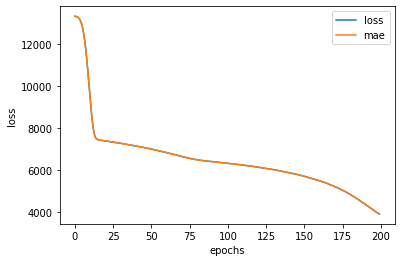

In [44]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## **Column Transformer**

In [45]:
# Using column transformer for normalization and one-hot encoding

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [46]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, # Use MSE when larger errors are more important
                        optimizer=tf.keras.optimizers.Adam(), # Look at the default values for both SGD and Adam
                        metrics=['mae'])

# Fit the model
history_2 = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [47]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3190.1243 - mae: 3190.1243


[3190.124267578125, 3190.124267578125]

In [48]:
# Check the number of parameters
insurance_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


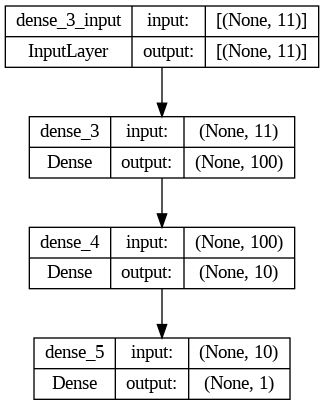

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(insurance_model, show_shapes=True)

In [50]:
# Save a model using the SavedModel format
insurance_model.save('insurance_model_SavedModel_format')

In [51]:
# Save a model using the HDF5 format
insurance_model.save("insurance_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [52]:
# Loading the model is the same for both formats
loaded_saved_model = tf.keras.models.load_model("insurance_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [53]:
def mae(y_test, y_pred):
    """
    Calculuates mean absolute error between y_test and y_preds.
    """
    return tf.metrics.mean_absolute_error(y_test,
                                            y_pred)
  
def mse(y_test, y_pred):
    """
    Calculates mean squared error between y_test and y_preds.
    """
    return tf.metrics.mean_squared_error(y_test,
                                        y_pred)

In [54]:
y_pred = insurance_model.predict(X_test_normal) 
y_pred_loaded = loaded_saved_model.predict(X_test_normal) 

9/9 [==============================] - 0s 2ms/step


In [55]:
(mae(y_test, y_pred.squeeze()) == mae(y_test, y_pred_loaded.squeeze())).numpy()

True

# **Summary of Classification**

In [56]:
# Create the data points
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [57]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [58]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

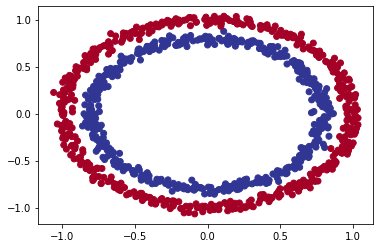

In [59]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [60]:
# Write a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

##**Binary Classification**

In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # "relu"
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # "sigmoid"
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # "Adam" with the default values including learning rate 0.001
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [63]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9800


[0.053627122193574905, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


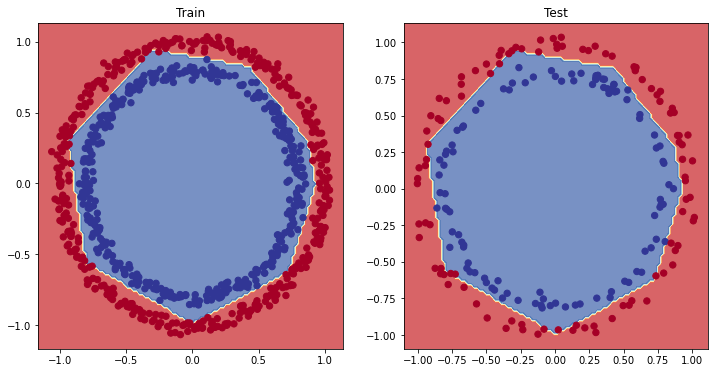

In [64]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

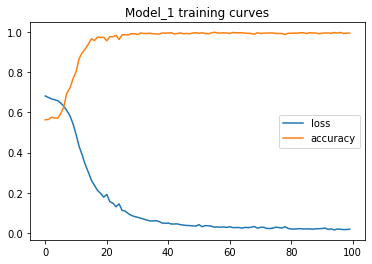

In [65]:
# Plot the loss and accuracy curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")
plt.show()

###**Learning Rate Scheduler**

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # "relu"
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # "sigmoid"
])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-2 * 10**(-epoch/100))

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(), # "Adam"
                metrics=['accuracy'])

# Fit the model (passing the lr_scheduler callback)
history = model_2.fit(X_train, 
                      y_train, 
                      epochs=200,
                      callbacks=[lr_scheduler],
                      verbose=0)

In [67]:
# Check the accuracy of our model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9750
Model loss on test set: 0.09322208166122437
Model accuracy on test set: 97.50%


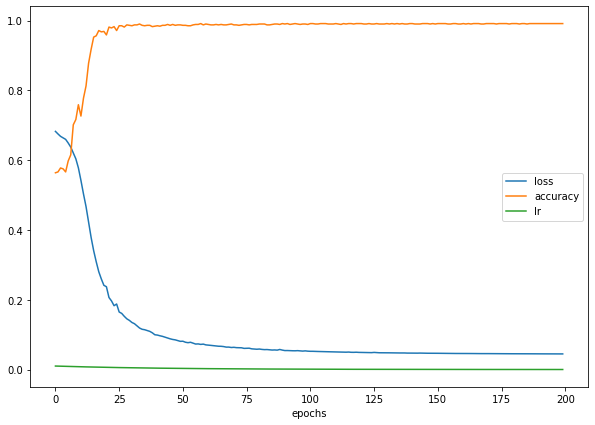

In [68]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

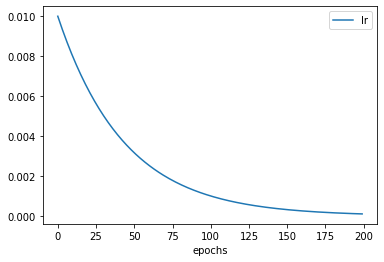

In [69]:
pd.DataFrame(history.history).plot(y=["lr"], xlabel="epochs")
plt.show()

In [70]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_2.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[96,  4],
       [ 1, 99]])

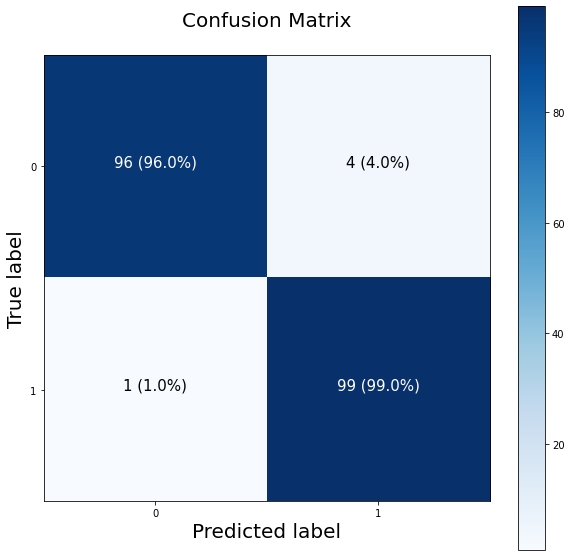

In [71]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

## **Multiclass Classification**

In [72]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [73]:
# Check the shape of training data
train_data.shape

(60000, 28, 28)

In [74]:
df = pd.DataFrame({'labels': train_labels})
df.value_counts()

labels
0         6000
1         6000
2         6000
3         6000
4         6000
5         6000
6         6000
7         6000
8         6000
9         6000
dtype: int64

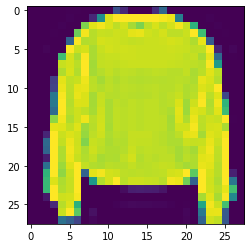

In [75]:
# Show one case in the taining data
plt.imshow(train_data[7]);

In [76]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

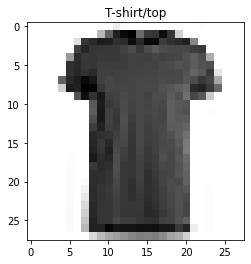

In [77]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

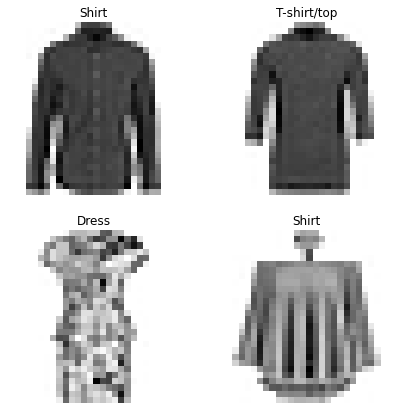

In [78]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [79]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # vs CategoricalCrossentropy() for one-hot encoded target
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate for this case as tested (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_3.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [81]:
# Make predictions with the most recent model
y_probs = model_3.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

In [82]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [83]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [84]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [85]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
        y_true: Array of truth labels (must be same shape as y_pred).
        y_pred: Array of predicted labels (must be same shape as y_true).
        classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=15).
    
    Returns:
        A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
        make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes), # create enough axis slots for each class
            yticks=np.arange(n_classes), 
            xticklabels=labels, # axes will labeled with class names (if they exist) or ints
            yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

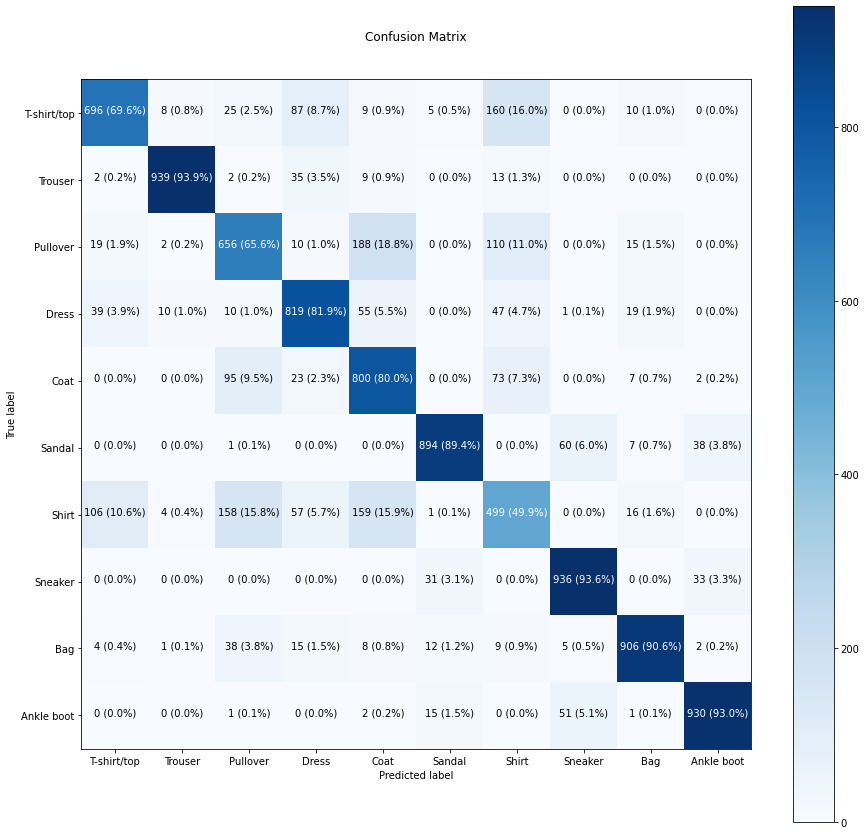

In [86]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

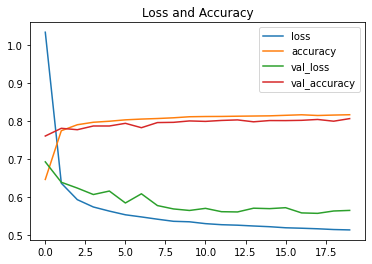

In [87]:
pd.DataFrame(history.history).plot(title="Loss and Accuracy");